In [1]:
import pandas as pd 
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading the dataset using datasets library
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data cleaning.
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset='salary_year_avg').copy()

In [3]:
top6_job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

In [6]:
df_US_top6 = df_US[df_US['job_title_short'].isin(top6_job_titles)]

In [22]:
order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

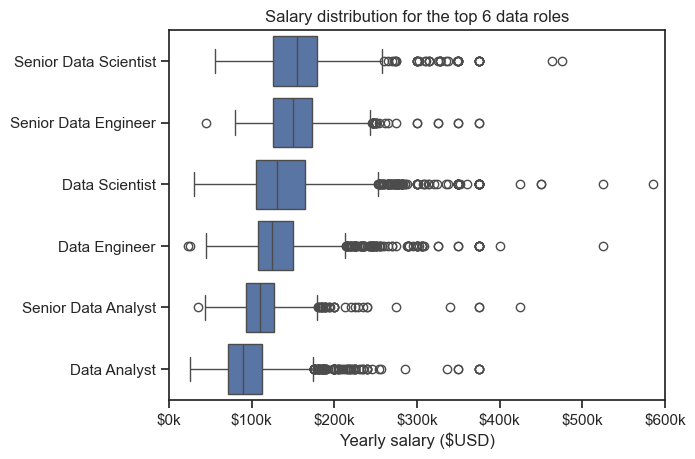

In [23]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y='job_title_short', order=order)
sns.set_theme(style='ticks')

plt.title('Salary distribution for the top 6 data roles')
plt.ylabel('')
plt.xlabel('Yearly salary ($USD)')
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, __: f'${int(x/1000)}k'))
plt.show()

